In [1]:
from TemporalNetwork import ContTempNetwork
import matplotlib.pyplot as plt
import numpy as np
import pickle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

Could not load sparse_dot_mkl. Will use scipy.sparse for matrix products.


In [2]:
net = ContTempNetwork.load('evolving_SBM_net_2activities')

In [3]:
t_start = 0
t_end = 200
switch = (t_end - t_start) / 2
matrix1 = net.compute_static_adjacency_matrix(start_time=t_start, end_time=switch).toarray()
matrix2 = net.compute_static_adjacency_matrix(start_time=switch, end_time=t_end).toarray()

In [4]:
net.compute_laplacian_matrices(save_adjacencies=True, random_walk=False)
number_active_events = []
for i,t in enumerate(net.times[:-1]):
    number_active_events.append(np.sum(net.adjacencies[i].toarray()) / 2)

In [5]:
selected_lamdas = np.logspace(-5,0,10)
window = 100

In [6]:
Conditional_S_selected100 = []
for i, lamda in enumerate(selected_lamdas):
    with open(f'//scratch/tmp/180/skoove/evolving_SBM_2activities/window_S_selected/{window}/window_S{lamda:.11f}', 'rb') as f:
        S_rate = pickle.load(f)
        Conditional_S_selected100.append(S_rate['window_S'][f'{lamda:.11f}'])

/tmp/ipykernel_3512636/1007533455.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # otherwise the right y-label is slightly clipped


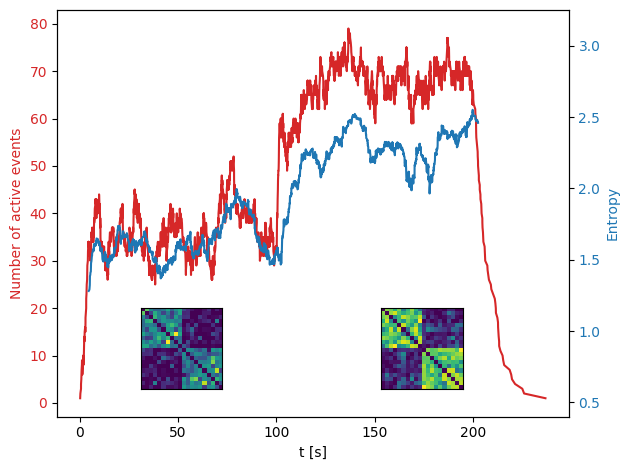

In [7]:
####### Enotrpy Plot
fig, ax = plt.subplots()
color = 'tab:red'
ax.plot(net.times[:-1], number_active_events, color=color)

ax.set_xlabel("t [s]")
ax.set_ylabel("Number of active events", color=color)
ax.tick_params(axis='y', labelcolor=color)



ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

index = 6
S = Conditional_S_selected100[index]

color = 'tab:blue'
ax2.plot(net.times[window // 2 + 1: -window // 2], S[1:], color=color, alpha=1)
ax2.set_xlabel("t [s]")
ax2.set_ylabel("Entropy", color=color)
ax2.set_ylim(0.4, 3.25)
ax2.tick_params(axis='y', labelcolor=color)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1, matrix2]
positions = [0.13, 0.60]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax2, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax2.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    #inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

plt.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/evolving_SBM/evolving_SBM_2activities.png', format='png', dpi=300, bbox_inches='tight')

In [8]:
window = 5
Conditional_S_selected5_new = []
for i, lamda in enumerate(selected_lamdas):
    with open(f'//scratch/tmp/180/skoove/evolving_SBM_2activities/window_S_selected_new/{window}/window_S{lamda:.11f}', 'rb') as f:
        S_rate = pickle.load(f)
        Conditional_S_selected5_new.append(S_rate['window_S'][f'{lamda:.11f}'])

In [9]:
considered_times = net.times[net.times < net.times[-1] - window]
range = len(considered_times)
print(range)

2715


In [13]:
len(net.times)

2716

/tmp/ipykernel_3512636/3834109643.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # otherwise the right y-label is slightly clipped


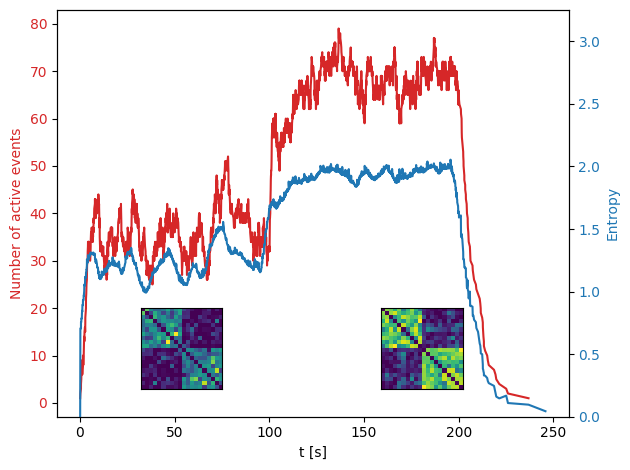

In [18]:
####### Enotrpy Plot
fig, ax = plt.subplots()
color = 'tab:red'
ax.plot(net.times[:-1], number_active_events, color=color)

ax.set_xlabel("t [s]")
ax.set_ylabel("Number of active events", color=color)
ax.tick_params(axis='y', labelcolor=color)



ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

index = 6
S = Conditional_S_selected5_new[index]

color = 'tab:blue'
ax2.plot(net.times, S, color=color, alpha=1)
ax2.set_xlabel("t [s]")
ax2.set_ylabel("Entropy", color=color)
ax2.set_ylim(0, 3.25)
ax2.tick_params(axis='y', labelcolor=color)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1, matrix2]
positions = [0.13, 0.60]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax2, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax2.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    #inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

plt.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/evolving_SBM/evolving_SBM_2activities.png', format='png', dpi=300, bbox_inches='tight')